### Uploading Kaggle file

In [15]:
!mkdir %USERPROFILE%\.kaggle
!copy kaggle.json %USERPROFILE%\.kaggle\kaggle.json

A subdirectory or file C:\Users\mohit\.kaggle already exists.


        1 file(s) copied.


### Importing dataset from kaggle

In [27]:
import kaggle

kaggle.api.authenticate()
kaggle.api.dataset_download_files('kazanova/sentiment140',path='.',unzip=True)

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140


### Importing Libraries

In [228]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score 
import matplotlib.pyplot as plt

In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [54]:
stopwords.words('english')[0:5]

['i', 'me', 'my', 'myself', 'we']

## Data Processing

In [69]:
#loading dataset into pandas dataframe 
twitter_data = pd.read_csv(r'C:\Users\mohit\Desktop\Python Programming\Jupyter-Notebooks\training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1')

In [71]:
twitter_data.shape

(1599999, 6)

In [73]:
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [75]:
 # adding column names and reading dataset again
column_names=['target','id','date','flag','user','text']
twitter_data = pd.read_csv(r'C:\Users\mohit\Desktop\Python Programming\Jupyter-Notebooks\training.1600000.processed.noemoticon.csv', names=column_names, encoding='ISO-8859-1')

In [77]:
twitter_data.shape

(1600000, 6)

In [79]:
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [81]:
# counting missing values
twitter_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [87]:
twitter_data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

Converting the target "4" to "1"


In [95]:
twitter_data.replace({'target':{4:1}}, inplace=True)

In [97]:
twitter_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

0 --> Negative Tweet   
1 --> Positive Tweet

### Stemming

In [103]:
port_stem=PorterStemmer()

In [105]:
def stemmer(content):
    stemmed_content=re.sub('[^a-zA-Z]',' ',content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

In [109]:
twitter_data['stemmed_text']=twitter_data['text'].apply(stemmer)

In [111]:
twitter_data.head()

,target,id,date,flag,user,text,stemmed_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [113]:
# separating the data and label
X= twitter_data['stemmed_text'].values
Y= twitter_data['target'].values

In [117]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [119]:
print(Y)

[0 0 0 ... 1 1 1]


### Splitting data into train and test data

In [130]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [131]:
print(X.shape,X_train.shape,X_test.shape)

(1600000,) (1280000,) (320000,)


### Converting text data to numeric data

In [135]:
vectorizer=TfidfVectorizer()

X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [137]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9453092 stored elements and shape (1280000, 461488)>
  Coords	Values
  (0, 436713)	0.27259876264838384
  (0, 354543)	0.3588091611460021
  (0, 185193)	0.5277679060576009
  (0, 109306)	0.3753708587402299
  (0, 235045)	0.41996827700291095
  (0, 443066)	0.4484755317023172
  (1, 160636)	1.0
  (2, 109306)	0.4591176413728317
  (2, 124484)	0.1892155960801415
  (2, 407301)	0.18709338684973031
  (2, 129411)	0.29074192727957143
  (2, 406399)	0.32105459490875526
  (2, 433560)	0.3296595898028565
  (2, 77929)	0.31284080750346344
  (2, 443430)	0.3348599670252845
  (2, 266729)	0.24123230668976975
  (2, 409143)	0.15169282335109835
  (2, 178061)	0.1619010109445149
  (2, 150715)	0.18803850583207948
  (2, 132311)	0.2028971570399794
  (2, 288470)	0.16786949597862733
  (3, 406399)	0.29029991238662284
  (3, 158711)	0.4456939372299574
  (3, 151770)	0.278559647704793
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 318303)	0.21254698865277744
  (12

In [139]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2289192 stored elements and shape (320000, 461488)>
  Coords	Values
  (0, 15110)	0.1719352837797837
  (0, 31168)	0.1624772418052177
  (0, 67828)	0.26800375270827315
  (0, 106069)	0.36555450010904555
  (0, 132364)	0.255254889555786
  (0, 138164)	0.23688292264071406
  (0, 171378)	0.2805816206356074
  (0, 271016)	0.45356623916588285
  (0, 279082)	0.17825180109103442
  (0, 388348)	0.2198507607206174
  (0, 398906)	0.34910438732642673
  (0, 409143)	0.3143047059807971
  (0, 420984)	0.17915624523539805
  (1, 6463)	0.30733520460524466
  (1, 15110)	0.211037449588008
  (1, 145393)	0.575262969264869
  (1, 217562)	0.40288153995289894
  (1, 256777)	0.28751585696559306
  (1, 348135)	0.4739279595416274
  (1, 366203)	0.24595562404108307
  (2, 22532)	0.3532582957477176
  (2, 34401)	0.37916255084357414
  (2, 89448)	0.36340369428387626
  (2, 183312)	0.5892069252021465
  (2, 256834)	0.2564939661498776
  :	:
  (319994, 443794)	0.2782185641032538


## Model Training

Logistic Regression

In [143]:
model= LogisticRegression(max_iter=1000)

In [145]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation

Accuracy Score on Train data

In [150]:
X_train_pred=model.predict(X_train)
training_accuracy=accuracy_score(Y_train,X_train_pred)

In [222]:
training_accuracy

0.79871953125

Accuracy Score on Test data

In [160]:
X_test_pred=model.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_test_pred)

In [162]:
testing_accuracy

0.77668125

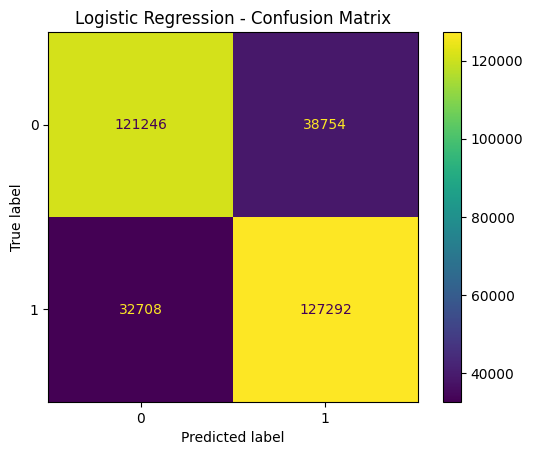

In [226]:
def plot_conf_matrix(model, X_test, y_test, title):
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='viridis', values_format='d')
    plt.title(f'{title} - Confusion Matrix')
    plt.show()
plot_conf_matrix(model, X_test, Y_test, "Logistic Regression")

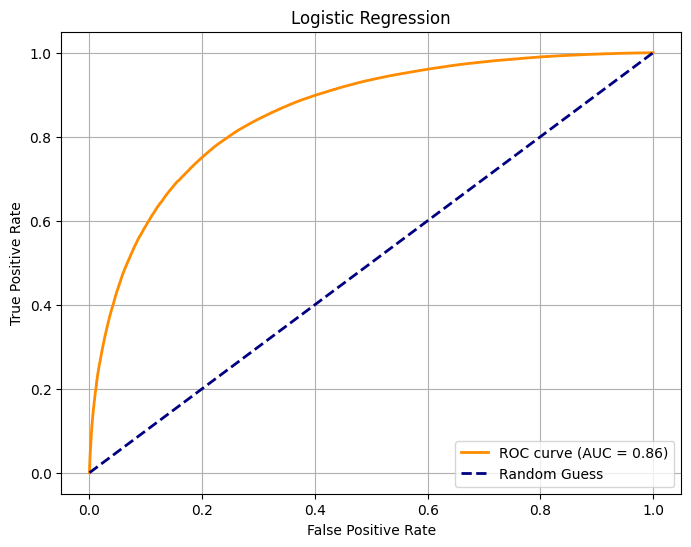

In [210]:
def plot_roc_curve(model, X_test, y_test, title):
    y_prob = model.predict_proba(X_test)[:, 1]  
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_value = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_value:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

plot_roc_curve(model, X_test, Y_test, "Logistic Regression")

### Model Accuracy = 77.6%

Saving trained model

In [166]:
import pickle

In [170]:
file = 'trained_model.sav'
pickle.dump(model,open(file,'wb'))

Loading Saved Model

In [182]:
loaded_model = pickle.load(open(r'C:\Users\mohit\Desktop\Python Programming\Jupyter-Notebooks\trained_model.sav','rb'))

In [184]:
X_new = X_test[6523]
print(Y_test[6523])

0


In [186]:
prediction=loaded_model.predict(X_new)
print(prediction)

[0]
